# Лабораторна робота 3
### Студента групи МІТ-31 (підгрупа 1)
### Дриги Михайла Сергійовича

## Завдання
1. Створити набір даних за допомогою DatasetGenerator
2. Завантажити набір даних для класифікації на сайті (у кожного студента має бути інший - прошу організуватись відповідним чином)
3. (опціонально для отримання відмінної оцінки) Згенерувати набір даних для клаcифікації на основі звичайних можливостей Python.
4. Для отриманих наборів даних провести встановленні кроки моделювання.
5. Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab3.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

## Завдання 1

In [2]:
X, y = make_regression(n_samples=512, n_features=10, n_informative=512, n_targets=1,  noise=0.0, shuffle=True, coef=False, random_state=None)

print(X,y)

[[ 1.10458552e+00  6.61400132e-01 -1.37952388e+00 ... -1.06508992e+00
  -1.29829792e+00 -5.38007480e-01]
 [ 1.24714006e-02  3.25738381e-01 -3.62087529e-01 ...  1.57433773e+00
  -2.65127557e-01 -1.95612675e+00]
 [ 1.01202991e+00 -3.57258583e-01  6.48062573e-01 ... -1.08704395e+00
   1.45902930e-01 -2.91455961e-01]
 ...
 [ 6.59134590e-01 -1.58923213e+00  6.76885463e-01 ... -1.09154879e+00
   1.43359441e+00 -3.65263581e-01]
 [ 6.36390307e-02  1.39553338e-03  1.39853147e-01 ...  9.13560221e-01
  -1.35610092e+00  1.19877601e+00]
 [-8.97281713e-02  5.41835679e-01  6.89509101e-01 ...  5.90077965e-01
  -2.74424439e+00  1.90461723e+00]] [ 1.96519478e+01  1.11968197e+02  4.50814639e+01 -3.22677385e+01
  1.57505646e+02 -2.20618761e+02 -2.23276092e+02  1.79761368e+02
  2.22671615e+02  8.96346013e+01 -6.23359942e+01 -2.78039258e+02
 -4.53915816e+01  4.78532117e+01  2.72123413e+02  7.95836476e+01
 -2.11712576e+02 -1.43845121e+02 -1.82491177e+02 -3.27658934e+02
  1.94799018e+02 -1.27790480e+02  6.580

In [3]:
df = pd.DataFrame(X, y)
df.to_csv('sk_data_set.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9
19.651948,1.104586,0.661400,-1.379524,2.181894,-0.460634,0.883302,0.759040,-1.065090,-1.298298,-0.538007
111.968197,0.012471,0.325738,-0.362088,-0.213170,1.529613,0.303570,-0.646511,1.574338,-0.265128,-1.956127
45.081464,1.012030,-0.357259,0.648063,0.050429,-0.176767,-0.848108,2.070093,-1.087044,0.145903,-0.291456
-32.267738,-0.065106,-1.374045,-1.190033,-1.124314,1.017410,-1.962282,-1.579611,0.218326,0.973062,1.632059
157.505646,-0.075867,-0.873594,-0.982937,0.086672,2.442260,-0.638468,-0.215972,0.541473,-0.133164,0.978307


## Завдання 2

In [4]:
df = pd.read_csv('heart.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

In [5]:
df.replace({'M': 0, 'F':1,  "Normal":0, "LVH":1, "ST":2, "N":0, "Y":1, "Flat":0, "Up":1, "Down":2}, None, True)
#"TA":0, "ASY":1, "ATA":2, "NAP":3,

In [6]:
df.tail(5)

,0,1,2,3,4,5,6,7,8,9
235.817483,0.661526,1.049761,0.887587,0.095994,0.474711,-1.758317,0.334189,-1.703193,1.879646,2.266215
-107.831797,0.159905,-1.034621,-1.180563,-0.722718,0.690080,1.337211,-0.567514,0.175733,-0.754762,0.289151
157.538036,-0.035514,0.729801,-0.191513,0.414788,1.935549,0.978140,0.422292,-0.579716,-1.572589,0.941658
16.983543,0.203407,0.036660,0.247178,-1.163270,0.781469,1.080887,0.363231,0.189365,-1.070029,0.123836
-257.869078,-0.372036,-0.298787,-1.006615,-1.384082,0.051411,-1.002078,0.309833,-0.064322,-2.346115,-0.051785


In [7]:
print(df.shape)

(512, 10)


In [8]:
print(df['ChestPainType'].unique())

KeyError: 'ChestPainType'

In [9]:
print(df.groupby('ChestPainType').size())

KeyError: 'ChestPainType'

In [10]:
sns.countplot(df['ChestPainType'],label="Count")
plt.show()

KeyError: 'ChestPainType'

In [11]:
df.drop('ChestPainType', axis=1).plot(kind='box', subplots=True, layout=(2,6), sharex=False, sharey=False, figsize=(30,15), 
                                        title='Box Plot for each input variable')
plt.savefig('data_box_plot')
plt.show()

KeyError: "['ChestPainType'] not found in axis"

In [12]:
import pylab as pl
df.drop('ChestPainType' ,axis=1).hist(bins=60, figsize=(12,12))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('data_hist')
plt.show()

KeyError: "['ChestPainType'] not found in axis"

In [13]:
import sklearn.model_selection
import sklearn.datasets
from sklearn.datasets import make_classification

X, y = sklearn.datasets.make_classification(n_samples=1024, n_features=20, class_sep=0.98, random_state=0)
model1 = (sklearn.model_selection.train_test_split(X, y, test_size=0.5, random_state=0),) # x_train, x_test, y_train, y_test

model2 = pd.DataFrame(data={'X':[np.random.uniform(-4.0, 4.0) for i in range(1000)],'Y':[np.random.uniform(-300.0, 300.0) for i in range(1000)],'Z':['90.0' for i in range(1000)]})

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.92
Accuracy of Logistic regression classifier on test set: 0.91


In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.86


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.87


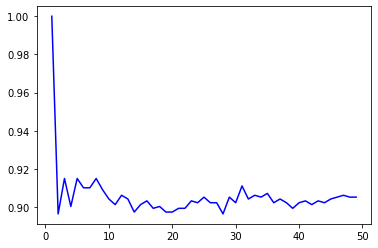

In [18]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
v=[]

k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    k_pred = knn.predict(X)
    v.append( metrics.accuracy_score(y, k_pred))


import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Blue',)
plt.show()

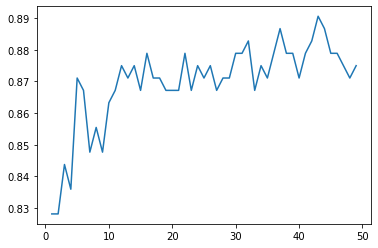

In [19]:
from sklearn import metrics
v=[]


k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.accuracy_score(y_test, k_pred))



import matplotlib.pyplot as plt
plt.plot(k_range,v)

plt.show()

In [20]:
knn = KNeighborsClassifier(n_neighbors=12)
# fit the model with data
knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.875

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.93
Accuracy of LDA classifier on test set: 0.91


In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.92
Accuracy of GNB classifier on test set: 0.88


In [23]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.96
Accuracy of SVM classifier on test set: 0.91


In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[106  20]
 [ 12 118]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       126
           1       0.86      0.91      0.88       130

    accuracy                           0.88       256
   macro avg       0.88      0.87      0.87       256
weighted avg       0.88      0.88      0.87       256



In [25]:
sns.FacetGrid(df, hue="ChestPainType", size=6) \
   .map(plt.scatter, "RestingBP", "Oldpeak") \
   .add_legend()

plt.show()

C:\Users\Mkarlos\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: 'ChestPainType'

In [26]:
g = sns.FacetGrid(df, col="Sex", height=3.5, aspect=.65)
g.map(sns.histplot, "ChestPainType")

KeyError: 'Sex'

## Завдання 3

In [27]:
import random as rnd

sex = {0:'Man', 1:'Woman'}
age = {0:'<20', 1:'>20'}
certificate = {0:'have', 1:'dont have'}
student = {0:'YES', 1:'NO'}
numb_of_certif = {0:'0', 1:'1', 2:'2', 3:'More than 3'}
language = {0:'Ukraine', 1:'Russia', 2:'English', 3:'Italia', 4:'France', 5:'Germany', 6:'Romania'}
data = []
for i in range(0, 512):
    row = []
    row.append(round(rnd.uniform(1, 50), 2))
    row.append(round(rnd.uniform(1, 10), 2))
    row.append(sex[rnd.randint(0, 1)])
    row.append(age[rnd.randint(0, 1)])
    row.append(certificate[rnd.randint(0, 1)])
    row.append(student[rnd.randint(0, 1)])
    row.append(numb_of_certif[rnd.randint(0, 3)])
    row.append(language[rnd.randint(0, 6)])
    data.append(row)
df = pd.DataFrame(data, columns=['main_points', 'extra_points', 'sex', 'age', 'certificate', 'student', 'numb_of_certif', 'language'])

In [28]:
df.replace({'Man': 0, 'Woman':1, '<20': 0, '>20':1, 'have':0, 'dont have':1, 'YES':0, 'NO':1, '0':0, '1':1, '2':2, 'More than 3':3, 'Ukraine': 0
, 'Russia':1, 'English':2, 'Italia':3, 'France':4, 'Germany':5, 'Romania':6}, None, True)

df.to_csv('my_data_set.csv')

In [29]:
df.head()

,total_utility_bill,commission,sex,age,certificate,student,numb_of_certif,language
0,5.55,6.16,0,0,1,1,3,2
1,46.40,3.50,0,0,0,1,3,6
2,13.65,1.81,1,1,0,0,1,0
3,45.59,4.81,0,0,0,1,2,2
4,32.43,7.72,0,1,0,0,3,4


In [30]:
df.tail()

,total_utility_bill,commission,sex,age,certificate,student,numb_of_certif,language
507,30.54,6.08,0,1,0,1,3,2
508,33.88,5.33,1,0,1,0,0,1
509,48.10,9.67,0,0,0,1,1,0
510,10.50,4.75,1,1,1,0,2,2
511,4.08,8.92,0,0,1,1,3,1


In [31]:
print("language")
print(df['language'].unique())

language
[2 6 0 4 3 5 1]


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_utility_bill  512 non-null    float64
 1   commission          512 non-null    float64
 2   sex                 512 non-null    int64  
 3   age                 512 non-null    int64  
 4   certificate         512 non-null    int64  
 5   student             512 non-null    int64  
 6   numb_of_certif      512 non-null    int64  
 7   language            512 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 32.1 KB


In [33]:
df.describe()

,total_utility_bill,commission,sex,age,certificate,student,numb_of_certif,language
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,25.489727,5.415059,0.531250,0.503906,0.484375,0.521484,1.533203,3.064453
std,13.829111,2.662126,0.499511,0.500474,0.500245,0.500027,1.108088,1.982740
min,1.150000,1.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.800000,3.227500,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,26.075000,5.160000,1.000000,1.000000,0.000000,1.000000,2.000000,3.000000
75%,37.247500,7.870000,1.000000,1.000000,1.000000,1.000000,2.250000,5.000000
max,49.760000,10.000000,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000


C:\Users\Mkarlos\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


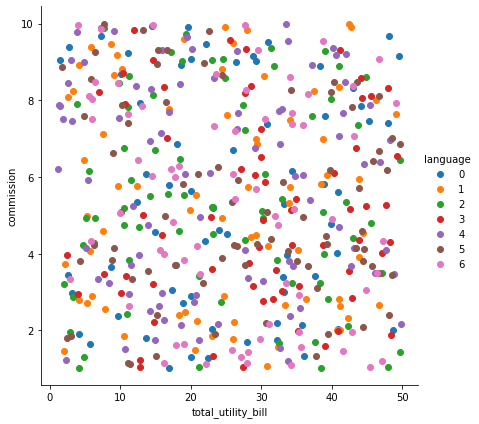

In [34]:
sns.FacetGrid(df, hue="language", size=6) \
   .map(plt.scatter, "main_points", "extra_points") \
   .add_legend()

plt.show()

In [35]:
features = list(df.columns[1:7])            	
target = df.columns[7]                     

print('Features:',features)
print('Target:',target)

# store feature matrix in "X"
X = df.iloc[:,1:7]                         

# store response vector in "y"
y = df.iloc[:,7]                           


print(y.shape)
print(X.shape)

Features: ['commission', 'sex', 'age', 'certificate', 'student', 'numb_of_certif']
Target: language
(512,)
(512, 6)


In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)


df['Encodedlanguage'] = y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)
df.tail(10)

Classes: [0 1 2 3 4 5 6]
Response variable after encoding: [2 6 0 2 4 3 5 3 1 4 4 3 1 5 4 1 0 1 3 6 2 2 4 6 5 3 6 4 6 5 5 1 5 6 2 5 5
 6 4 1 1 3 0 2 0 5 2 6 0 5 1 4 3 1 0 5 3 2 0 0 4 2 3 2 6 1 6 3 1 4 5 4 4 6
 1 6 0 1 5 3 0 4 3 4 5 4 1 3 5 2 2 1 4 0 2 2 4 4 4 2 3 5 2 3 4 1 6 0 3 6 5
 5 4 3 4 1 4 3 6 4 4 4 5 4 0 2 6 6 1 2 2 5 0 4 5 6 5 0 1 2 6 2 0 4 4 2 4 0
 1 5 6 5 5 5 5 1 0 5 3 3 3 1 6 5 3 0 1 1 3 2 1 5 0 0 3 2 1 6 4 5 3 1 2 1 6
 4 1 1 6 3 5 2 4 1 0 6 6 4 1 6 5 0 6 1 4 0 3 5 5 2 2 3 1 1 4 6 2 2 5 0 5 5
 3 3 4 5 5 4 4 5 2 0 4 3 5 4 6 5 5 1 1 3 6 0 4 2 3 4 6 6 4 4 5 2 3 5 4 3 4
 4 5 4 1 0 3 2 0 1 4 2 6 3 6 4 3 2 1 6 2 6 0 4 4 0 6 0 2 5 2 0 6 4 2 0 5 6
 6 0 1 0 5 5 1 0 0 1 6 0 5 6 1 3 2 4 0 2 4 2 0 0 2 6 4 4 2 6 1 2 2 5 1 1 3
 1 0 1 1 5 0 3 0 1 5 1 6 4 6 0 0 6 2 1 4 2 2 5 5 3 2 3 6 4 2 4 5 2 2 3 4 3
 6 5 2 4 5 3 5 2 6 4 0 6 6 2 3 1 2 5 0 3 0 4 3 5 4 0 4 2 1 1 1 2 5 2 4 6 5
 5 4 3 3 1 6 0 3 3 3 6 2 3 5 0 3 1 6 6 0 0 1 4 0 0 1 6 1 6 4 4 6 4 3 3 1 0
 3 0 1 3 1 5 4 3 0 5 2 4 6 0 4 2 6 2 5 1 

,total_utility_bill,commission,sex,age,certificate,student,numb_of_certif,language,Encodedlanguage
502,31.67,2.81,1,0,1,0,2,3,3
503,33.20,3.00,0,0,1,1,3,0,0
504,16.17,4.00,0,0,0,1,3,6,6
505,24.76,8.58,0,0,1,0,3,2,2
506,38.38,5.82,1,0,1,0,2,1,1
507,30.54,6.08,0,1,0,1,3,2,2
508,33.88,5.33,1,0,1,0,0,1,1
509,48.10,9.67,0,0,0,1,1,0,0
510,10.50,4.75,1,1,1,0,2,2,2
511,4.08,8.92,0,0,1,1,3,1,1


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [38]:
value = knn.predict([[3, 5, 6, 4, 2, 1]])
print('prediction value:',value)

print('Predicted Class', df.loc[df['Encodedlanguage'] == 2, 'language'].values[0])

prediction value: [0]
Predicted Class 2


In [39]:
X_new = [[3, 5, 6, 4, 2, 1], [6, 5, 4, 3, 2, 1]]                       
knn.predict(X_new)

array([0, 3], dtype=int64)

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

print(knn.predict(X_new))

kypred = knn.predict(X)

[0 2]


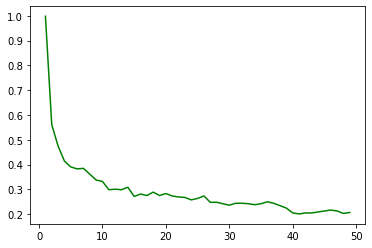

In [41]:
from sklearn import metrics
v=[]

k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X, y)
    k_pred = knn.predict(X)
    v.append( metrics.accuracy_score(y, k_pred))


import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Green',)
plt.show()

In [42]:

from sklearn import metrics
print(metrics.accuracy_score(y, kypred))

0.390625


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [44]:
print(X_train.shape)
print(y_train.shape)

(307, 6)
(307,)


In [45]:
knn = KNeighborsClassifier(n_neighbors=12)
# fit the model with data
knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.14146341463414633

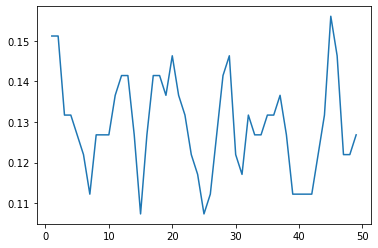

In [46]:
from sklearn import metrics
v=[]


k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.accuracy_score(y_test, k_pred))



import matplotlib.pyplot as plt
plt.plot(k_range,v)

plt.show()